In [33]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from scipy.stats import multivariate_normal,invwishart,wishart,gaussian_kde

# Makes things easier
def GetInv(m): return np.linalg.solve(m,np.eye(m.shape[1]))
np.random.seed(1)

data = pd.read_csv('../../diabetes.csv', index_col=0, header=0)
Y = data['y'].values
X = data.loc[:,'X.age':].values

Ysc = (Y - np.mean(Y))/np.std(Y)
Xsc = (X - np.mean(X,axis=0))/np.std(X,axis=0)

n,p = X.shape
nTrain = 342
trainIdx = np.arange(n)
np.random.shuffle(trainIdx)
trainIdx = trainIdx[:nTrain]
Xtrain = Xsc[trainIdx]; Xtest = Xsc[~trainIdx]
ytrain = Ysc[trainIdx]; ytest = Ysc[~trainIdx]

## 1. Least squares estimate

Model selection with t-test, t_crit = 1.65

(-3.5, 3.5)

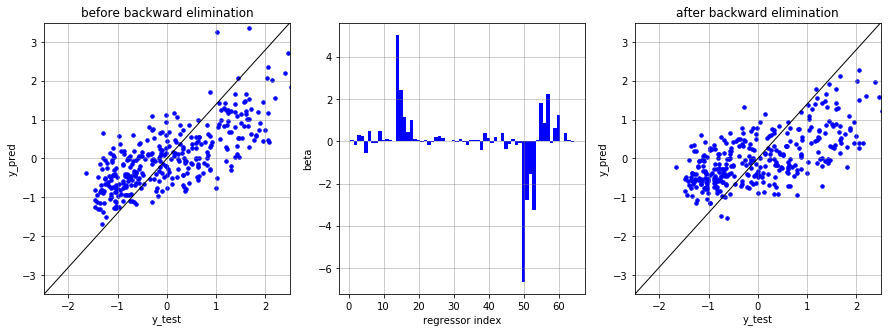

In [45]:
betaOLS = GetInv(Xtrain.T.dot(Xtrain)).dot(Xtrain.T).dot(ytrain)
sigmaOLS = np.sum((ytrain - Xtrain.dot(betaOLS))**2)/(nTrain - p)
ypred = Xtest.dot(betaOLS)

betaSE = np.sqrt((sigmaOLS**2)*GetInv(Xtrain.T.dot(Xtrain)).diagonal())
betaSig = betaOLS/betaSE > 1.65
betaBE = GetInv(Xtrain[:,betaSig].T.dot(Xtrain[:,betaSig])).dot(Xtrain[:,betaSig].T).dot(ytrain)

ypredBE = Xtest[:,betaSig].dot(betaBE)

fig,ax = plt.subplots(1,3, figsize=(15,5))
ax[0].plot([0,1],[0,1], transform=ax[0].transAxes, c='k', linewidth=1)
ax[0].scatter(ytest, ypred, s=12, c='b')
ax[0].set_xlabel('y_test')
ax[0].set_ylabel('y_pred')
ax[0].set_title('before backward elimination')
ax[0].grid(color='grey', alpha=0.5)
ax[0].set_xlim(-2.5, 2.5)
ax[0].set_ylim(-3.5, 3.5)

ax[1].bar(np.linspace(1,p,p), betaOLS, color='b', width=1)
ax[1].set_xlabel('regressor index')
ax[1].set_ylabel('beta')
ax[1].grid(color='grey', alpha=0.5)

ax[2].plot([0,1],[0,1], transform=ax[2].transAxes, c='k', linewidth=1)
ax[2].scatter(ytest, ypredBE, s=12, c='b')
ax[2].set_xlabel('y_test')
ax[2].set_ylabel('y_pred')
ax[2].set_title('after backward elimination')
ax[2].grid(color='grey', alpha=0.5)
ax[2].set_xlim(-2.5, 2.5)
ax[2].set_ylim(-3.5, 3.5)